# Import Libraries

In [201]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import silhouette_score


# Load the Dataset

In [191]:
df = pd.read_csv('C://Users//laphouse//Desktop//CC GENERAL.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# Data Inspection

In [192]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [193]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [194]:
df.drop(['CUST_ID'], axis=1, inplace = True)

df.fillna(df.median(), inplace=True)



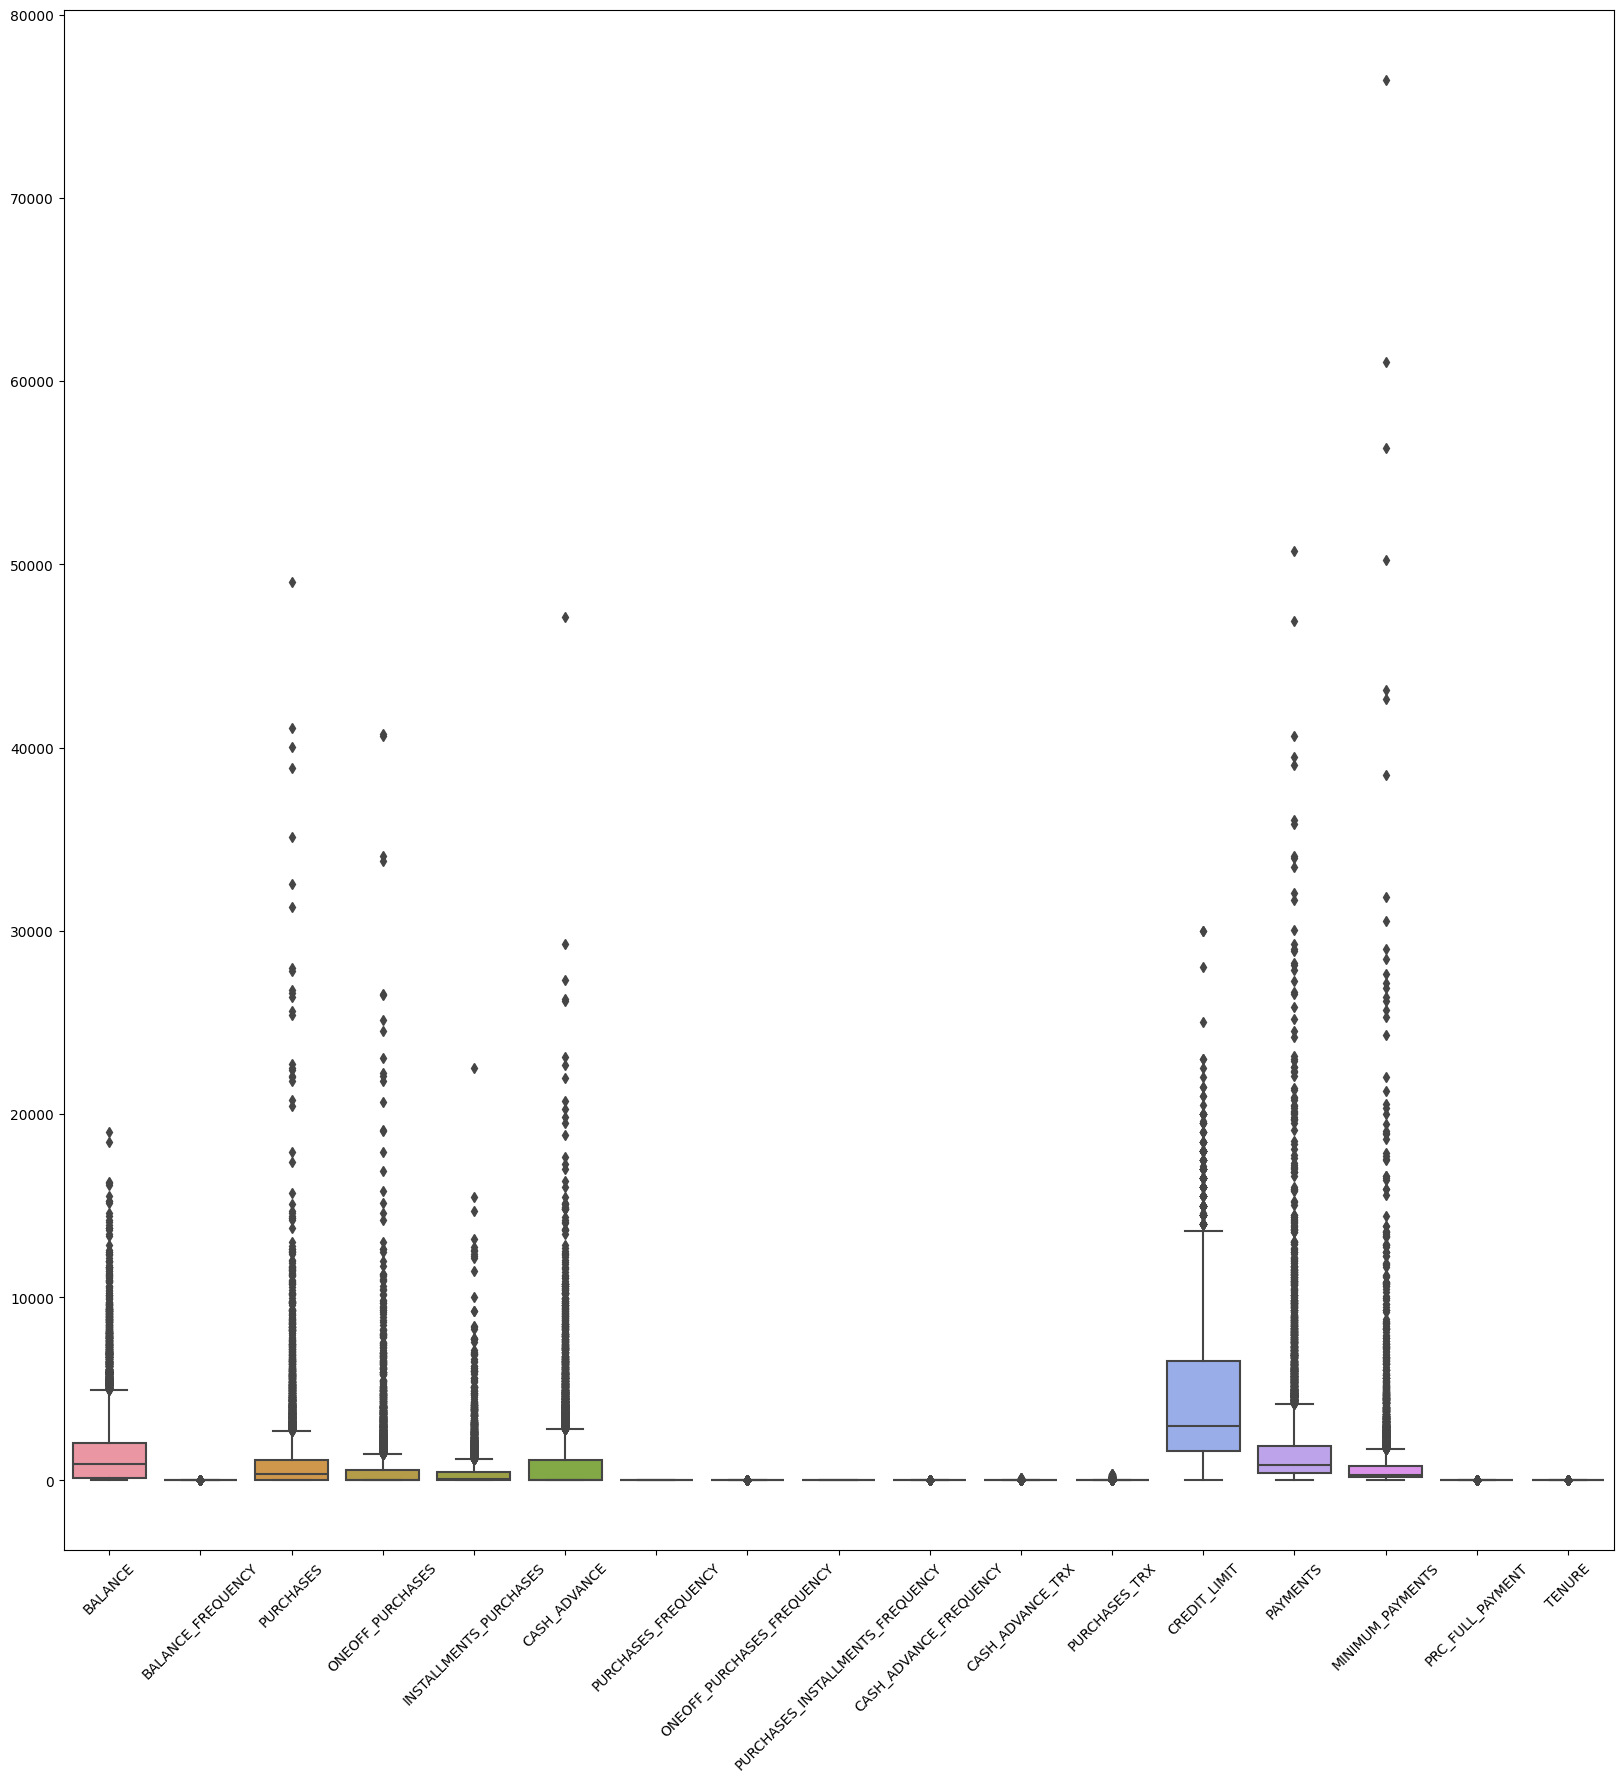

In [156]:
plt.figure(figsize=(20,20))
sns.boxplot(data =df)
plt.xticks(rotation=45)
plt.show()

# Handling Outliers

In [195]:
# Handling outliers with the best method for each column
def handle_outliers(df, columns, methods):
    for col in columns:
        df_handled = df.copy()
        results = {}
        for method in methods:
            if method == 'winsorize':
                # Winsorization
                Q1 = df_handled[col].quantile(0.25)
                Q3 = df_handled[col].quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR
                df_handled.loc[df_handled[col] < lower_bound, col] = lower_bound
                df_handled.loc[df_handled[col] > upper_bound, col] = upper_bound
                results[method] = {'mean': np.mean(df_handled[col]), 
                                   'std': np.std(df_handled[col]), 
                                   'skew': stats.skew(df_handled[col].values)}
            elif method == 'log_transform':
                # Log transformation
                df_handled[col] = np.log(df_handled[col])
                results[method] = {'mean': np.mean(df_handled[col]), 
                                   'std': np.std(df_handled[col]), 
                                   'skew': stats.skew(df_handled[col].values)}
            elif method == 'clip':
                # Clipping
                Q1 = df_handled[col].quantile(0.25)
                Q3 = df_handled[col].quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR
                df_handled.loc[df_handled[col] < lower_bound, col] = lower_bound
                df_handled.loc[df_handled[col] > upper_bound, col] = upper_bound
                results[method] = {'mean': np.mean(df_handled[col]), 
                                   'std': np.std(df_handled[col]), 
                                   'skew': stats.skew(df_handled[col].values)}
        
        # Finding the best method based on skewness
        skews = [results[m]['skew'] if m in results and not np.isnan(results[m]['skew']) else np.inf for m in methods]
        best_method = methods[np.argmin(skews)]
        
        
        # Applying the best method to the original data frame
        if best_method == 'winsorize':
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df.loc[df[col] < lower_bound, col] = lower_bound
            df.loc[df[col] > upper_bound, col] = upper_bound
        elif best_method == 'log_transform':
            df[col] = np.log(df[col])
        elif best_method == 'clip':
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df.loc[df[col] < lower_bound, col] = lower_bound
            df.loc[df[col] > upper_bound, col] = upper_bound
    
    return df

In [196]:
df_handled = handle_outliers(df, columns=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES',
                                          'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
                                          'PAYMENTS', 'MINIMUM_PAYMENTS'],
                                  methods=['winsorize', 'log_transform', 'clip'])

C:\Users\laphouse\Documents\NetBeansProjects\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\laphouse\Documents\NetBeansProjects\lib\site-packages\scipy\stats\_stats_py.py:1218: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean
C:\Users\laphouse\Documents\NetBeansProjects\lib\site-packages\numpy\lib\function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


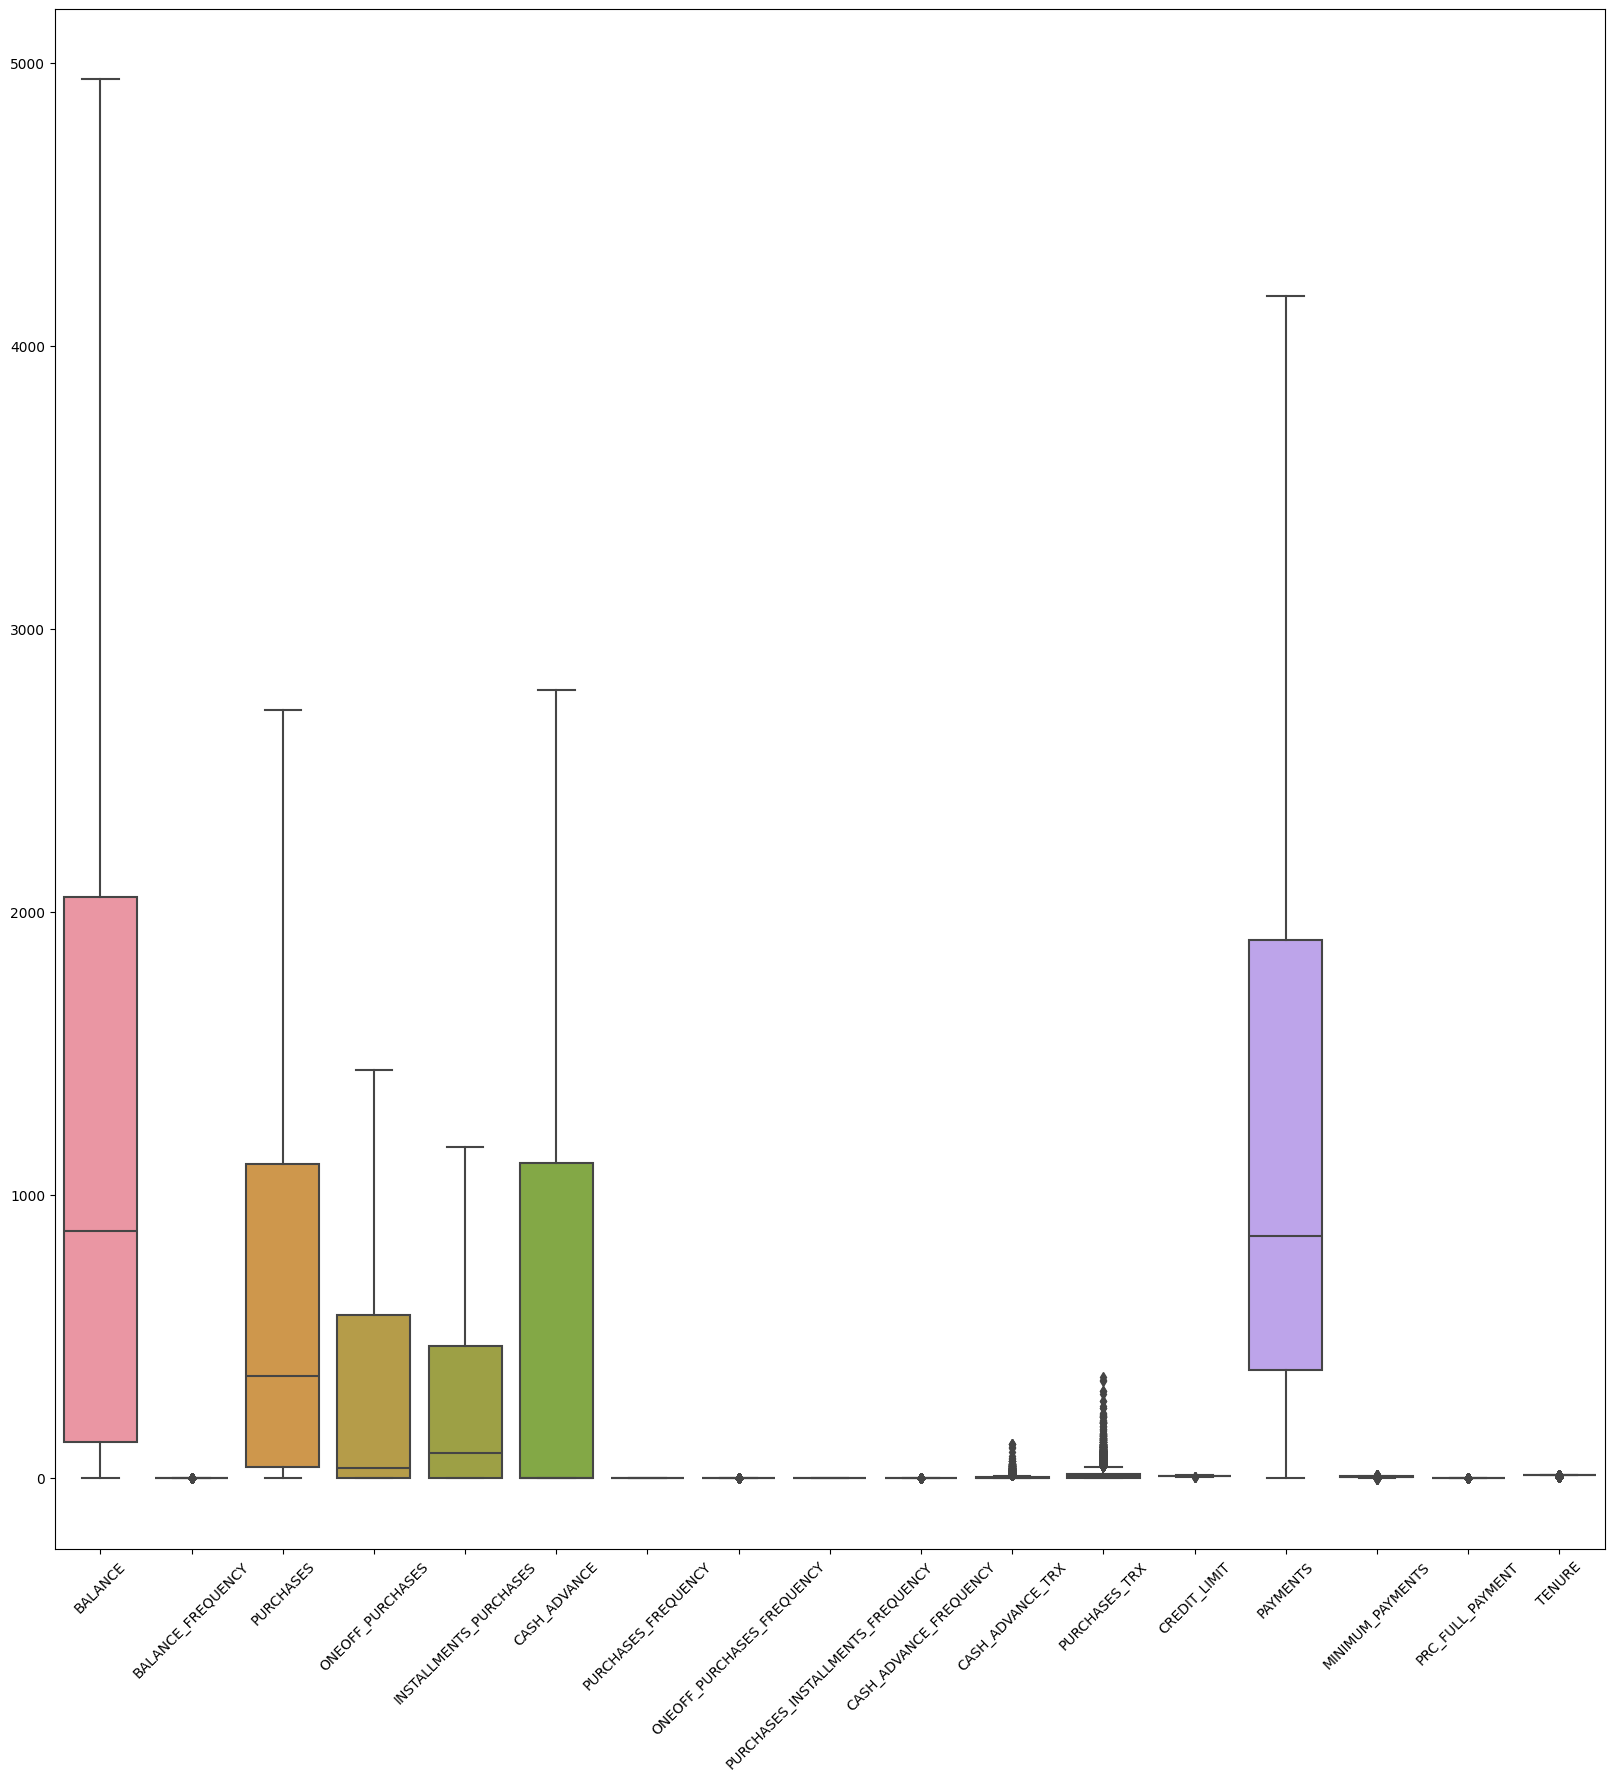

In [159]:
plt.figure(figsize=(20,20))
sns.boxplot(data =df_handled)
plt.xticks(rotation=45)
plt.show()

# Scaling 

#### Scaling with different methods and plotting elbow method and silouette score

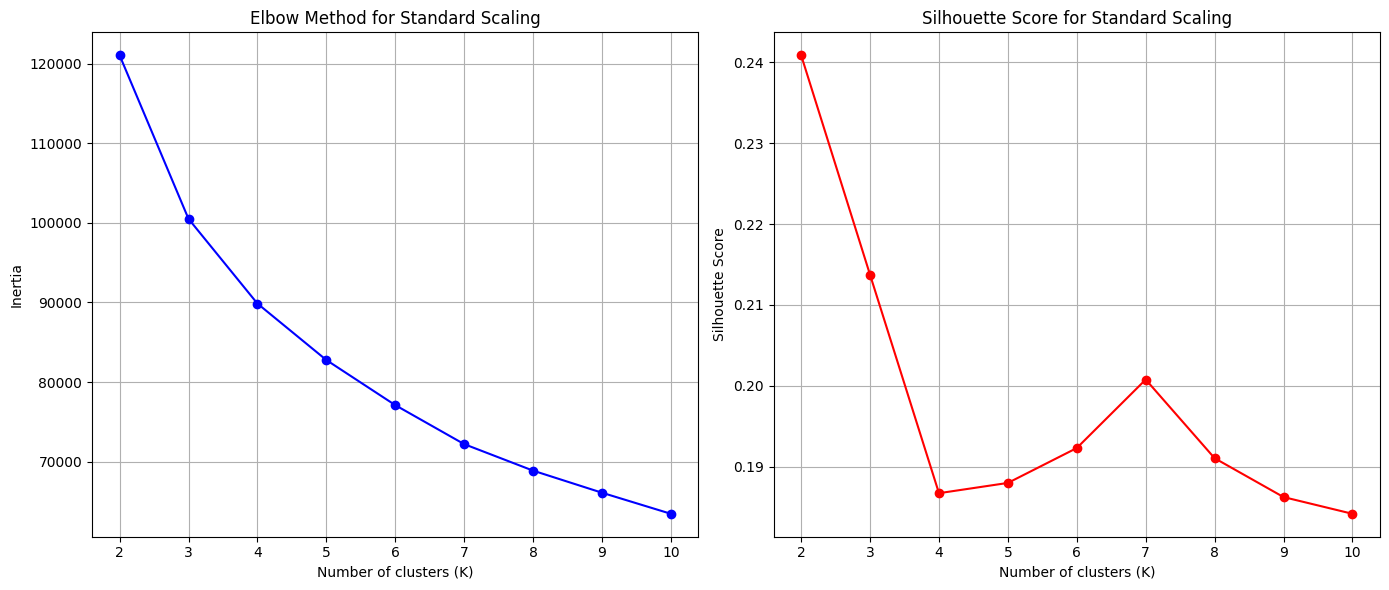

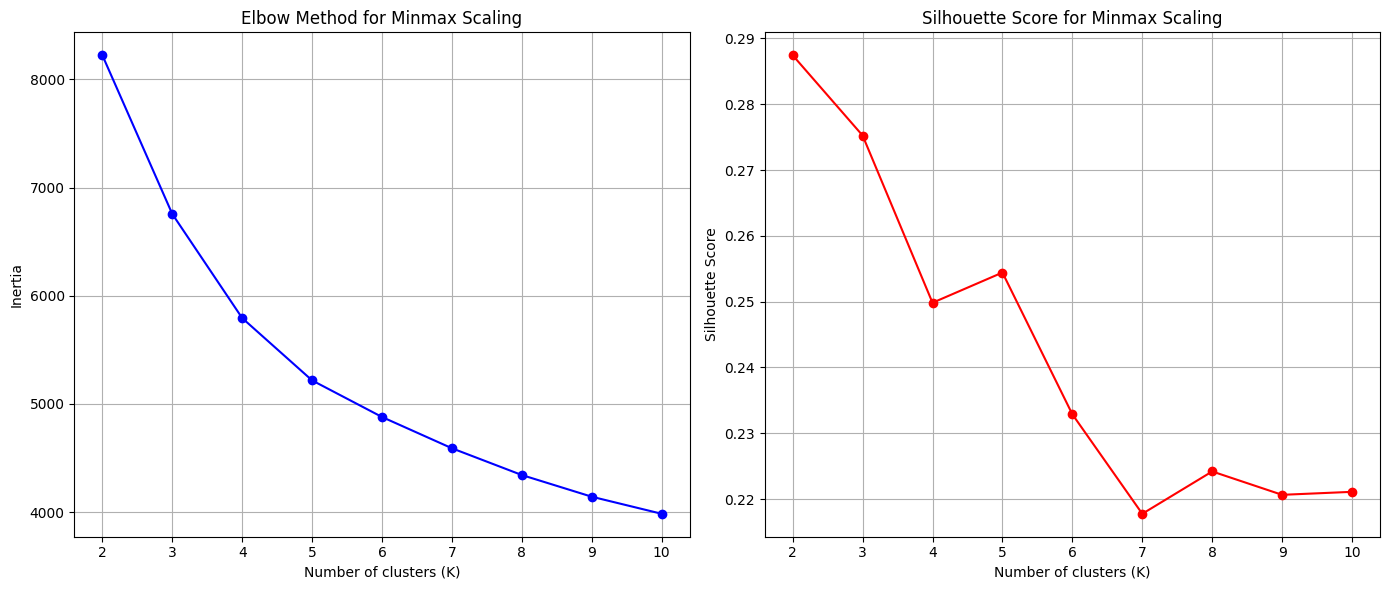

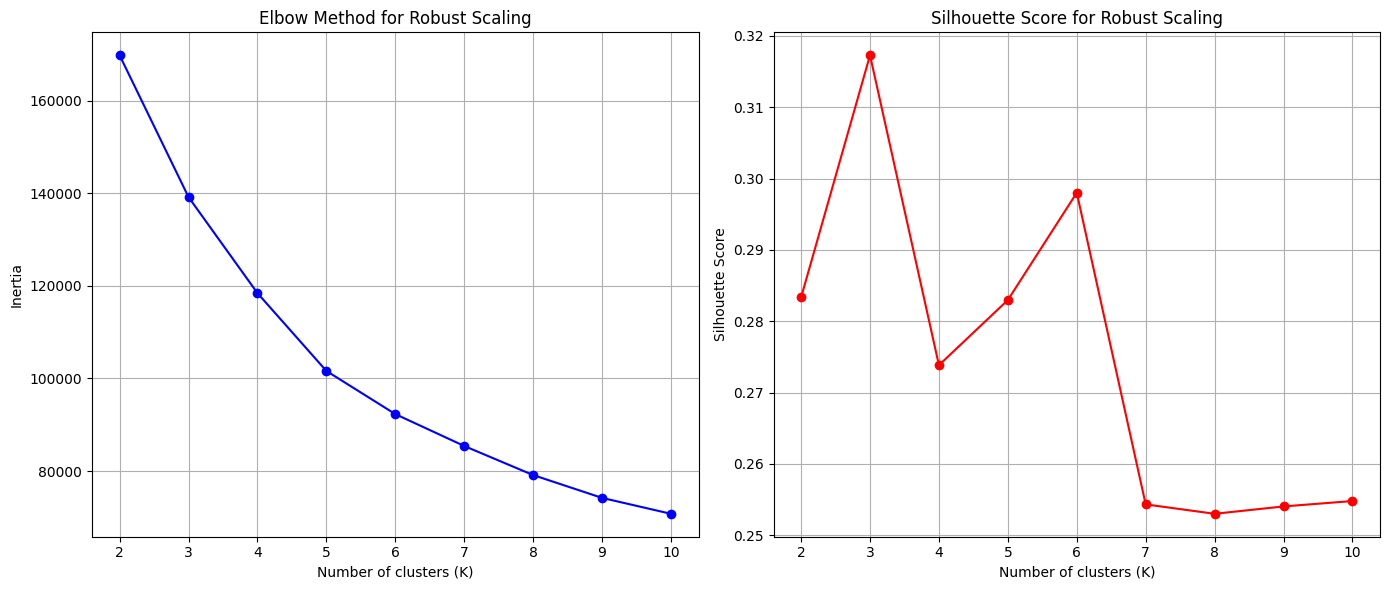

In [161]:
# Scaling the data using multiple methods
def scale_data(df_handled, scaling_method):
    if scaling_method == 'standard':
        scaler = StandardScaler()
    elif scaling_method == 'minmax':
        scaler = MinMaxScaler()
    elif scaling_method == 'robust':
        scaler = RobustScaler()
    else:
        raise ValueError("Invalid scaling method. Choose from 'standard', 'minmax', or 'robust'.")
    
    scaled_data = scaler.fit_transform(df_handled)
    scaled_df = pd.DataFrame(scaled_data, columns=df_handled.columns)
    return scaled_df


# Plotting the elbow method and the silouette score for each bscaling method
def plot_elbow_and_silhouette(scaled_df, scaling_method):
    inertias = []
    silhouette_scores = []
    K = range(2, 11)  
    
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_df)
        inertias.append(kmeans.inertia_)
        
        # Calculating the silhouette score
        labels = kmeans.labels_
        silhouette_avg = silhouette_score(scaled_df, labels)
        silhouette_scores.append(silhouette_avg)
    
    # Plotting the Elbow method
    plt.figure(figsize=(14, 6))
    
    # Elbow plot
    plt.subplot(1, 2, 1)
    plt.plot(K, inertias, 'bo-')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Inertia')
    plt.title(f'Elbow Method for {scaling_method.capitalize()} Scaling')
    plt.grid(True)

    # Silhouette score plot
    plt.subplot(1, 2, 2)
    plt.plot(K, silhouette_scores, 'ro-')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.title(f'Silhouette Score for {scaling_method.capitalize()} Scaling')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()



# Performing Standard Scaling and plot
scaled_df_standard = scale_data(df_handled, 'standard')
plot_elbow_and_silhouette(scaled_df_standard, 'standard')

# Performing MinMax Scaling and plot
scaled_df_minmax = scale_data(df_handled, 'minmax')
plot_elbow_and_silhouette(scaled_df_minmax, 'minmax')

# Performing Robust Scaling and plot
scaled_df_robust = scale_data(df_handled, 'robust')
plot_elbow_and_silhouette(scaled_df_robust, 'robust')


# KMeans

In [ ]:
# Hyperparameter tuning to find the best k value
def find_best_k(scaled_df, scaling_method, k_range=range(2, 11)):
    best_k = 0
    best_silhouette = -1
    silhouette_scores = []

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_df)
        labels = kmeans.labels_
        silhouette_avg = silhouette_score(scaled_df, labels)
        silhouette_scores.append(silhouette_avg)

        if silhouette_avg > best_silhouette:
            best_silhouette = silhouette_avg
            best_k = k

    print(f"Best k for {scaling_method} scaling: {best_k} with silhouette score: {best_silhouette}")

    # Plotting silhouette scores
    plt.figure(figsize=(8, 4))
    plt.plot(k_range, silhouette_scores, 'ro-')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.title(f'Silhouette Score for {scaling_method.capitalize()} Scaling')
    plt.grid(True)
    plt.show()

    return best_k

Best k for standard scaling: 2 with silhouette score: 0.2408493172635269


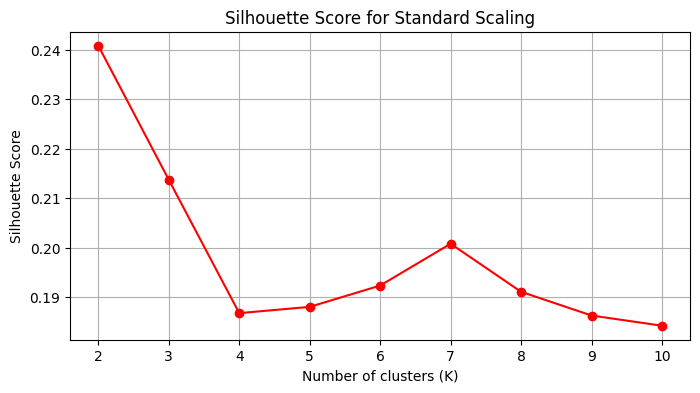

KMeans clustering applied with 2 clusters for standard scaling.
Best k for minmax scaling: 2 with silhouette score: 0.28743599387171687


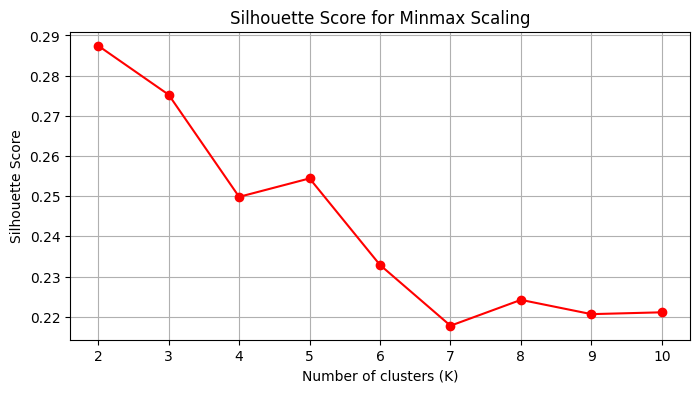

KMeans clustering applied with 2 clusters for minmax scaling.
Best k for robust scaling: 3 with silhouette score: 0.3172982511583064


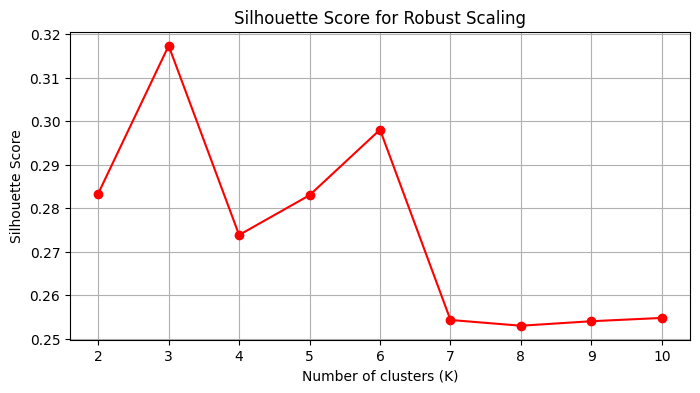

KMeans clustering applied with 3 clusters for robust scaling.


In [162]:
# Kmeans Algorithm
def apply_kmeans(scaled_df, n_clusters, scaling_method):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_df)
    labels = kmeans.labels_
    print(f"KMeans clustering applied with {n_clusters} clusters for {scaling_method} scaling.")
    return labels


# Performing Standard Scaling and find the best k
scaled_df_standard = scale_data(df_handled, 'standard')
best_k_standard = find_best_k(scaled_df_standard, 'standard')
labels_standard = apply_kmeans(scaled_df_standard, n_clusters=best_k_standard, scaling_method='standard')

# Performing MinMax Scaling and find the best k
scaled_df_minmax = scale_data(df_handled, 'minmax')
best_k_minmax = find_best_k(scaled_df_minmax, 'minmax')
labels_minmax = apply_kmeans(scaled_df_minmax, n_clusters=best_k_minmax, scaling_method='minmax')

# Performing Robust Scaling and find the best k
scaled_df_robust = scale_data(df_handled, 'robust')
best_k_robust = find_best_k(scaled_df_robust, 'robust')
labels_robust = apply_kmeans(scaled_df_robust, n_clusters=best_k_robust, scaling_method='robust')

# DBSCAN

In [168]:
# Hyperparameter tuning for DBSCAN
def find_best_dbscan(scaled_df, scaling_method, eps_range= [0.1, 0.5, 1.0, 1.5, 2], min_samples_range=range(2, 11)):
    best_eps = 0
    best_min_samples = 0
    best_silhouette = -1
    silhouette_scores = []

    for eps in eps_range:
        for min_samples in min_samples_range:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(scaled_df)
            
            # Check if there's more than one cluster and if there are any noise points
            if len(set(labels)) > 1 and len(set(labels)) < len(scaled_df):
                silhouette_avg = silhouette_score(scaled_df, labels)
                silhouette_scores.append((eps, min_samples, silhouette_avg))

                if silhouette_avg > best_silhouette:
                    best_silhouette = silhouette_avg
                    best_eps = eps
                    best_min_samples = min_samples

    print(f"Best parameters for {scaling_method} scaling: eps = {best_eps}, min_samples = {best_min_samples} with silhouette score: {best_silhouette}")

    # Plotting silhouette scores for different eps and min_samples combinations using bar plot
    plt.figure(figsize=(15, 8))

    # Grouping the silhouette scores by `min_samples` values for better visualization
    min_samples_groups = {min_samples: [] for min_samples in min_samples_range}
    for eps, min_samples, silhouette in silhouette_scores:
        min_samples_groups[min_samples].append((eps, silhouette))

    # Creating bar plots for each min_samples group
    for min_samples, eps_silhouettes in min_samples_groups.items():
        eps_vals = [eps for eps, _ in eps_silhouettes]
        silhouette_vals = [silhouette for _, silhouette in eps_silhouettes]
        plt.bar([f'eps={eps:.1f}' for eps in eps_vals], silhouette_vals, label=f'min_samples = {min_samples}')

    plt.xlabel('Epsilon (eps)')
    plt.ylabel('Silhouette Score')
    plt.title(f'Silhouette Score for {scaling_method.capitalize()} Scaling with DBSCAN')
    plt.legend(title='Min Samples', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.grid(True)
    plt.show()

    return best_eps, best_min_samples



Best parameters for standard scaling: eps = 2, min_samples = 6 with silhouette score: 0.2583004897096501


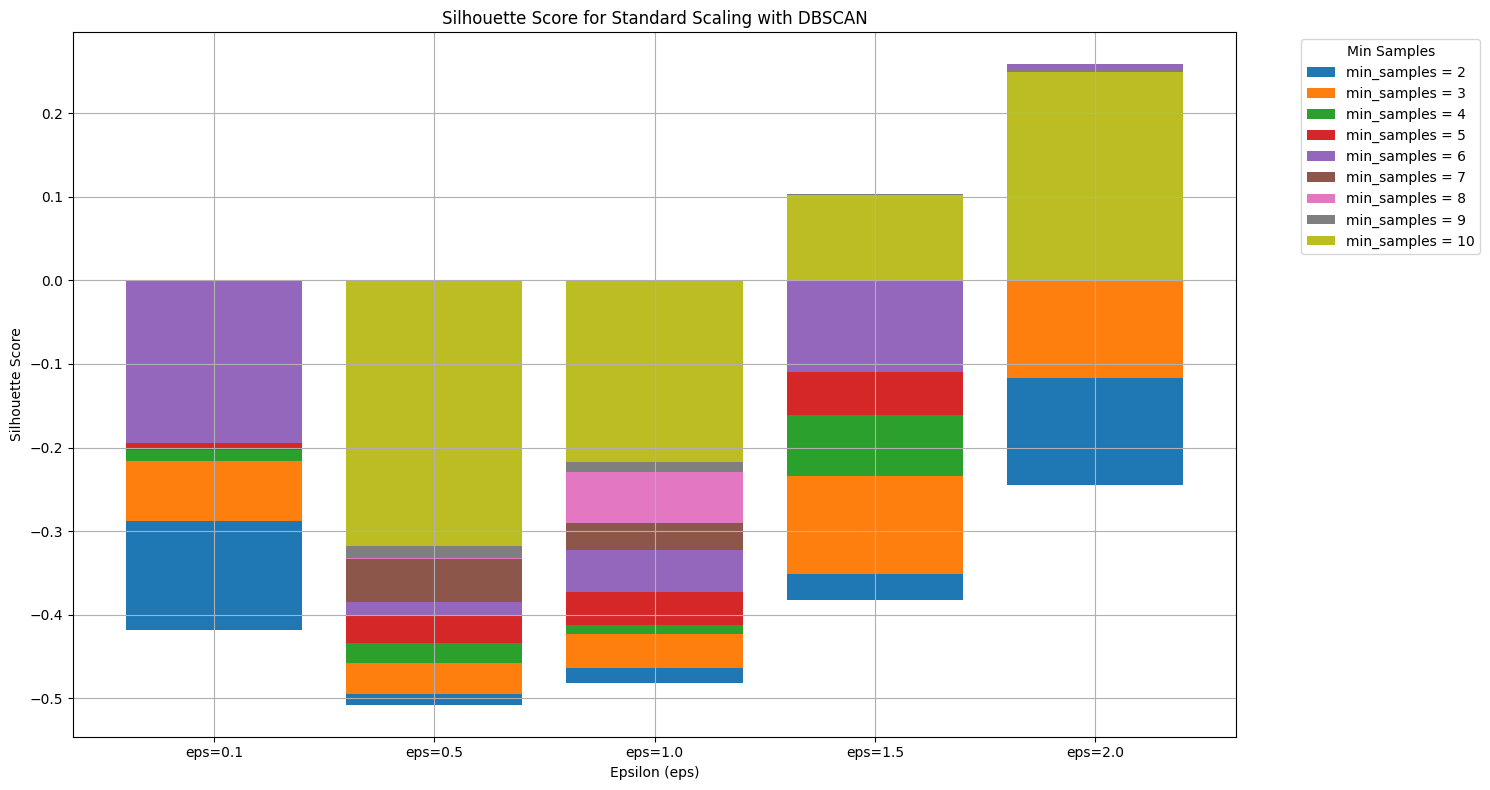

DBSCAN clustering applied with eps = 2, min_samples = 6 for standard scaling.
Best parameters for minmax scaling: eps = 0.5, min_samples = 9 with silhouette score: 0.1662835416187505


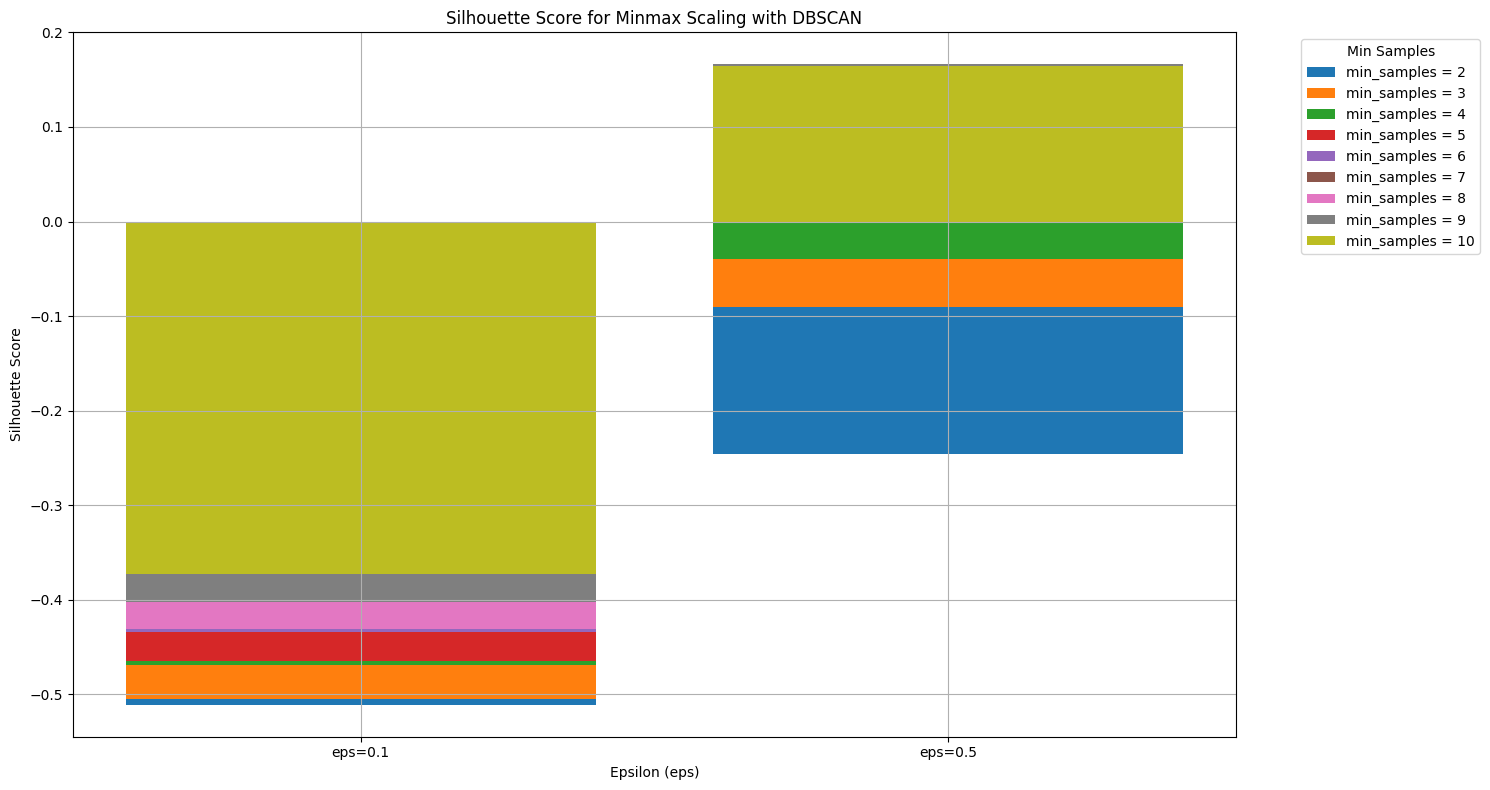

DBSCAN clustering applied with eps = 0.5, min_samples = 9 for minmax scaling.
Best parameters for robust scaling: eps = 2, min_samples = 6 with silhouette score: 0.3016375180674844


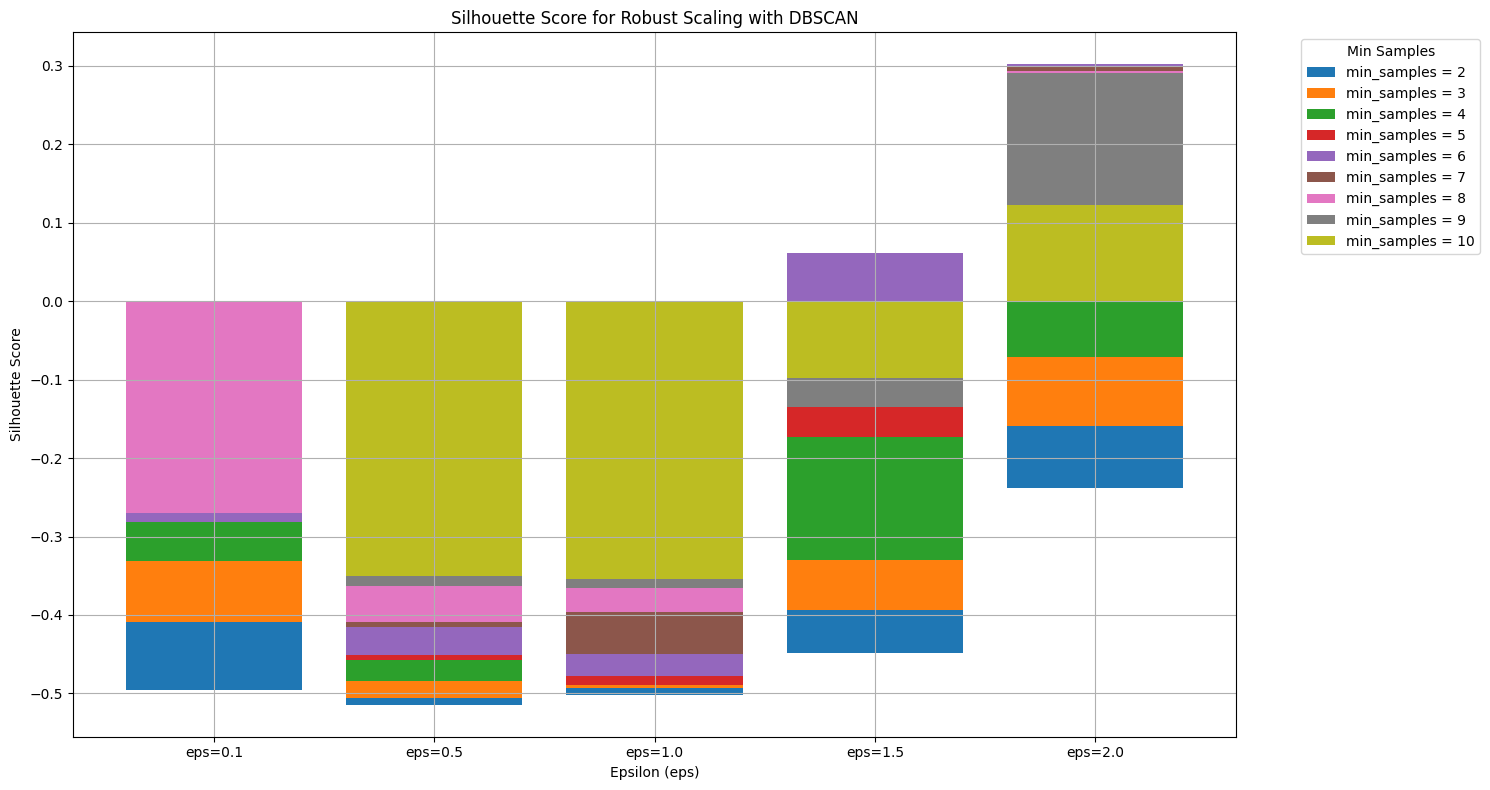

DBSCAN clustering applied with eps = 2, min_samples = 6 for robust scaling.


In [197]:
# DBSCAN Algorithm
def apply_dbscan(scaled_df, eps, min_samples, scaling_method):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(scaled_df)
    print(f"DBSCAN clustering applied with eps = {eps}, min_samples = {min_samples} for {scaling_method} scaling.")
    return labels


# Performing Standard Scaling and find the best parameters for DBSCAN
scaled_df_standard = scale_data(df_handled, 'standard')
best_eps_standard, best_min_samples_standard = find_best_dbscan(scaled_df_standard, 'standard')
labels_standard = apply_dbscan(scaled_df_standard, eps=best_eps_standard, min_samples=best_min_samples_standard, scaling_method='standard')

# Performing MinMax Scaling and find the best parameters for DBSCAN
scaled_df_minmax = scale_data(df_handled, 'minmax')
best_eps_minmax, best_min_samples_minmax = find_best_dbscan(scaled_df_minmax, 'minmax')
labels_minmax = apply_dbscan(scaled_df_minmax, eps=best_eps_minmax, min_samples=best_min_samples_minmax, scaling_method='minmax')

# Performing Robust Scaling and find the best parameters for DBSCAN
scaled_df_robust = scale_data(df_handled, 'robust')
best_eps_robust, best_min_samples_robust = find_best_dbscan(scaled_df_robust, 'robust')
labels_robust = apply_dbscan(scaled_df_robust, eps=best_eps_robust, min_samples=best_min_samples_robust, scaling_method='robust')

# Agglomerative Clustering

In [ ]:
# Hyperparameter tuning for agglomerative clustering
def find_best_agglomerative(scaled_df, scaling_method, k_range=range(2, 11), linkages=['single', 'complete', 'average', 'ward']):
    best_k = 0
    best_linkage = ''
    best_silhouette = -1
    silhouette_scores = []

    for linkage in linkages:
        for k in k_range:
            agg_clustering = AgglomerativeClustering(n_clusters=k, linkage=linkage)
            labels = agg_clustering.fit_predict(scaled_df)
            silhouette_avg = silhouette_score(scaled_df, labels)
            silhouette_scores.append((k, linkage, silhouette_avg))

            if silhouette_avg > best_silhouette:
                best_silhouette = silhouette_avg
                best_k = k
                best_linkage = linkage

    print(f"Best k for {scaling_method} scaling: {best_k} with linkage '{best_linkage}' and silhouette score: {best_silhouette}")

    # Plotting silhouette scores for different k and linkage combinations
    plt.figure(figsize=(10, 6))
    for linkage in linkages:
        scores = [score[2] for score in silhouette_scores if score[1] == linkage]
        plt.plot(k_range, scores, label=f'Linkage: {linkage}', marker='o')

    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.title(f'Silhouette Score for {scaling_method.capitalize()} Scaling with Agglomerative Clustering')
    plt.legend()
    plt.grid(True)
    plt.show()

    return best_k, best_linkage

Best k for standard scaling: 2 with linkage 'average' and silhouette score: 0.6737039247245816


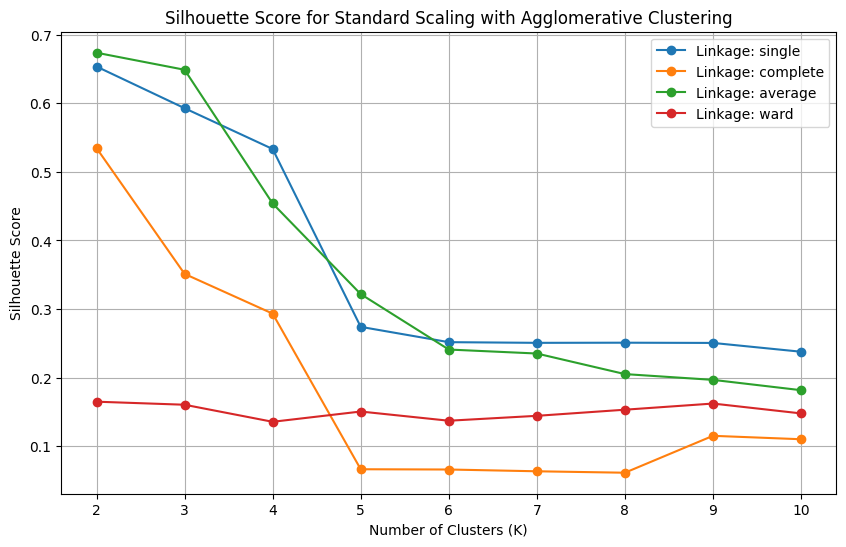

Agglomerative clustering applied with 2 clusters for standard scaling using average linkage.
Best k for minmax scaling: 2 with linkage 'ward' and silhouette score: 0.2575024053599558


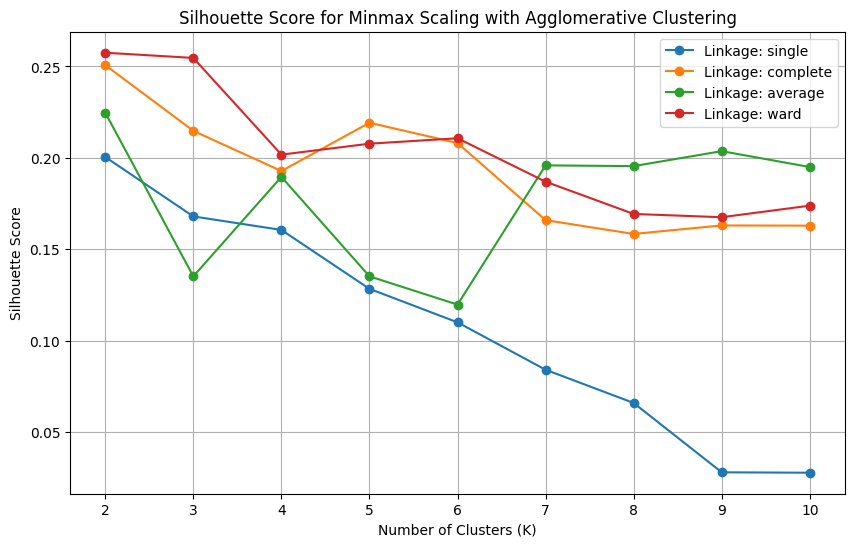

Agglomerative clustering applied with 2 clusters for minmax scaling using ward linkage.
Best k for robust scaling: 2 with linkage 'single' and silhouette score: 0.725169116368595


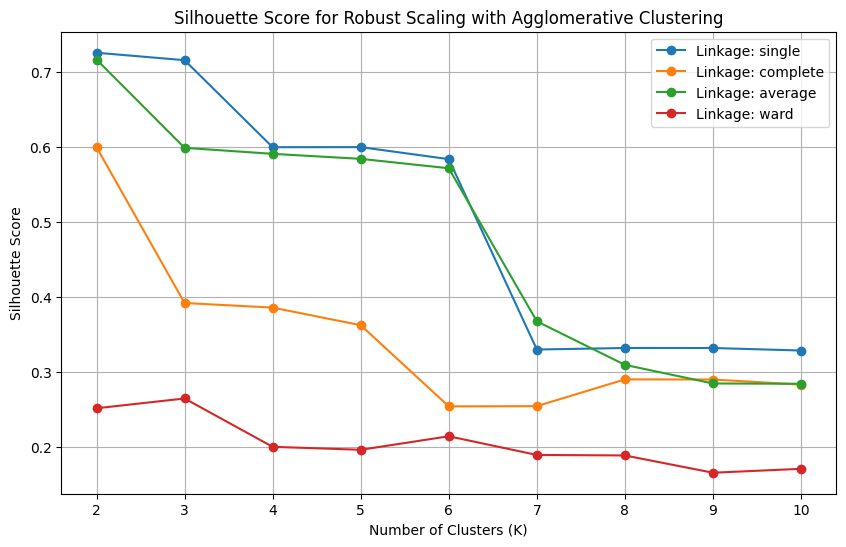

Agglomerative clustering applied with 2 clusters for robust scaling using single linkage.


In [200]:
# Agglomerative Clustering 
def apply_agglomerative(scaled_df, n_clusters, scaling_method, linkage):
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    labels = agg_clustering.fit_predict(scaled_df)
    print(f"Agglomerative clustering applied with {n_clusters} clusters for {scaling_method} scaling using {linkage} linkage.")
    return labels

# Performing Standard Scaling and find the best k and linkage
scaled_df_standard = scale_data(df_handled, 'standard')
best_k_standard, best_linkage_standard = find_best_agglomerative(scaled_df_standard, 'standard')
labels_standard = apply_agglomerative(scaled_df_standard, n_clusters=best_k_standard, scaling_method='standard', linkage=best_linkage_standard)

# Performing MinMax Scaling and find the best k and linkage
scaled_df_minmax = scale_data(df_handled, 'minmax')
best_k_minmax, best_linkage_minmax = find_best_agglomerative(scaled_df_minmax, 'minmax')
labels_minmax = apply_agglomerative(scaled_df_minmax, n_clusters=best_k_minmax, scaling_method='minmax', linkage=best_linkage_minmax)

# Performing Robust Scaling and find the best k and linkage
scaled_df_robust = scale_data(df_handled, 'robust')
best_k_robust, best_linkage_robust = find_best_agglomerative(scaled_df_robust, 'robust')
labels_robust = apply_agglomerative(scaled_df_robust, n_clusters=best_k_robust, scaling_method='robust', linkage=best_linkage_robust)


# Using PCA

#### Scaling

In [202]:
# Scaling with different methods
def scale_data(df_handled, scaling_method):
    if scaling_method == 'standard':
        scaler = StandardScaler()
    elif scaling_method == 'minmax':
        scaler = MinMaxScaler()
    elif scaling_method == 'robust':
        scaler = RobustScaler()
    else:
        raise ValueError("Invalid scaling method. Choose from 'standard', 'minmax', or 'robust'.")

    scaled_data = scaler.fit_transform(df_handled)
    scaled_df = pd.DataFrame(scaled_data, columns=df_handled.columns)
    return scaled_df


#### Plotting

In [203]:
# Plotting PCA clusters
def plot_pca_clusters(scaled_df, labels, title):
    pca = PCA(n_components=2, random_state=42)
    pca_results = pca.fit_transform(scaled_df)

    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(pca_results[:, 0], pca_results[:, 1], c=labels, cmap='viridis', marker='o')
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(scatter, label='Cluster Label')
    plt.show()


#### Hyperparameter Tuning

###### 1. Agglomerative

In [204]:
# Hyperparameter tuning for agglomerative clustering
def find_best_agglomerative_params(scaled_df, n_clusters_range=range(2, 11)):
    best_params = {}
    best_silhouette = -1

    for n_clusters in n_clusters_range:
        agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
        labels = agglomerative.fit_predict(scaled_df)

        # Calculate silhouette score
        silhouette_avg = silhouette_score(scaled_df, labels)

        if silhouette_avg > best_silhouette:
            best_silhouette = silhouette_avg
            best_params = {'n_clusters': n_clusters}

    print(f"Best Agglomerative parameters: {best_params} with silhouette score: {best_silhouette}")
    return best_params

###### 2. KMeans

In [205]:
# Hyperparameter tuning for KMeans clustering
def find_best_kmeans_params(scaled_df, n_clusters_range=range(2, 11)):
    best_params = {}
    best_silhouette = -1

    for n_clusters in n_clusters_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        labels = kmeans.fit_predict(scaled_df)

        # Calculate silhouette score
        silhouette_avg = silhouette_score(scaled_df, labels)

        if silhouette_avg > best_silhouette:
            best_silhouette = silhouette_avg
            best_params = {'n_clusters': n_clusters}

    print(f"Best KMeans parameters: {best_params} with silhouette score: {best_silhouette}")
    return best_params


##### 3. DBSCAN

In [206]:
# Hyperparameter tuning for DBSCAN clustering
def find_best_dbscan(scaled_df, scaling_method, eps_range=[0.1, 0.5, 1.0, 1.5, 2], min_samples_range=range(2, 11)):
    best_eps = 0
    best_min_samples = 0
    best_silhouette = -1
    silhouette_scores = []

    for eps in eps_range:
        for min_samples in min_samples_range:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(scaled_df)

            # Check if there's more than one cluster and if there are any noise points
            if len(set(labels)) > 1 and len(set(labels)) < len(scaled_df):
                silhouette_avg = silhouette_score(scaled_df, labels)
                silhouette_scores.append((eps, min_samples, silhouette_avg))

                if silhouette_avg > best_silhouette:
                    best_silhouette = silhouette_avg
                    best_eps = eps
                    best_min_samples = min_samples

    print(f"Best parameters for {scaling_method} scaling: eps = {best_eps}, min_samples = {best_min_samples} with silhouette score: {best_silhouette}")

    return best_eps, best_min_samples


Processing scaling method: standard
Best KMeans parameters: {'n_clusters': 2} with silhouette score: 0.2408493172635269
Best Agglomerative parameters: {'n_clusters': 2} with silhouette score: 0.16483768324912493
Best parameters for standard scaling: eps = 2, min_samples = 6 with silhouette score: 0.2583004897096501


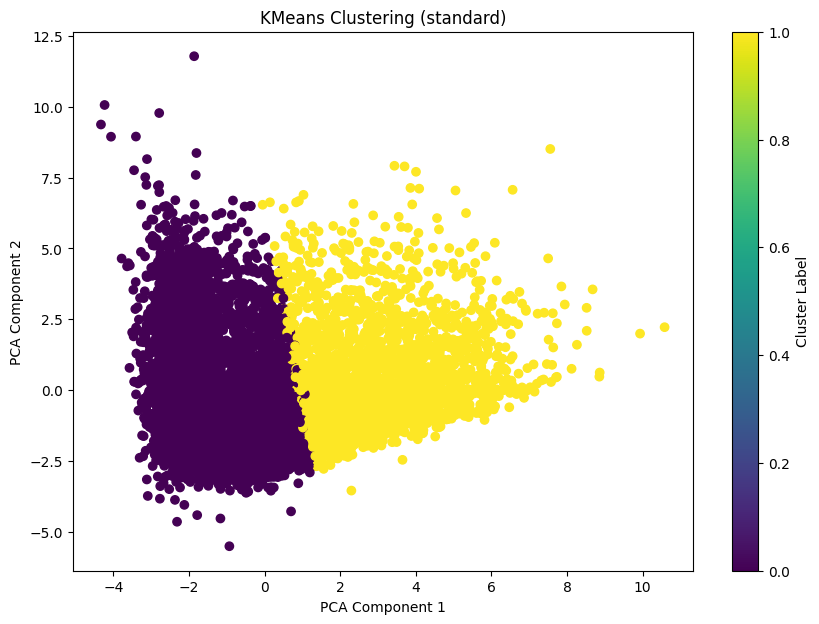

Best parameters for standard scaling: eps = 2, min_samples = 6 with silhouette score: 0.2583004897096501


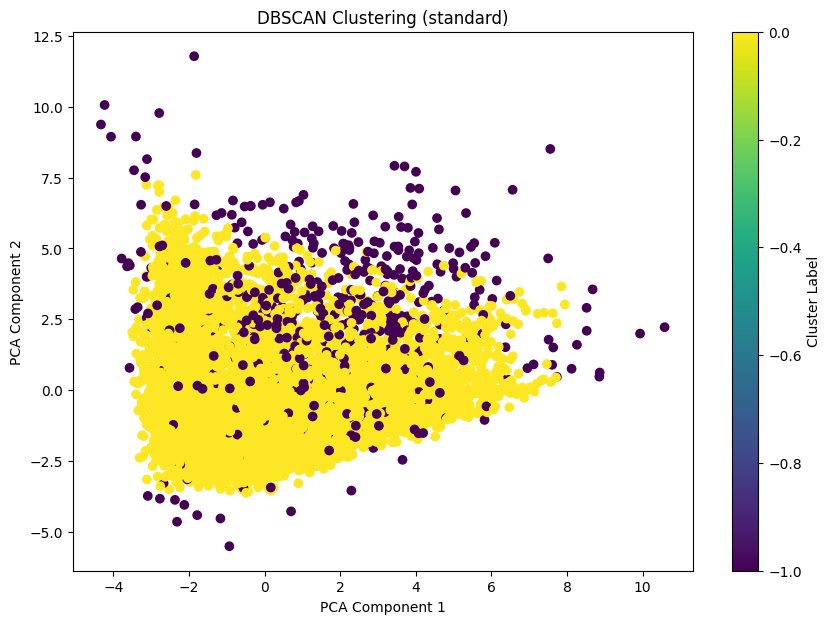

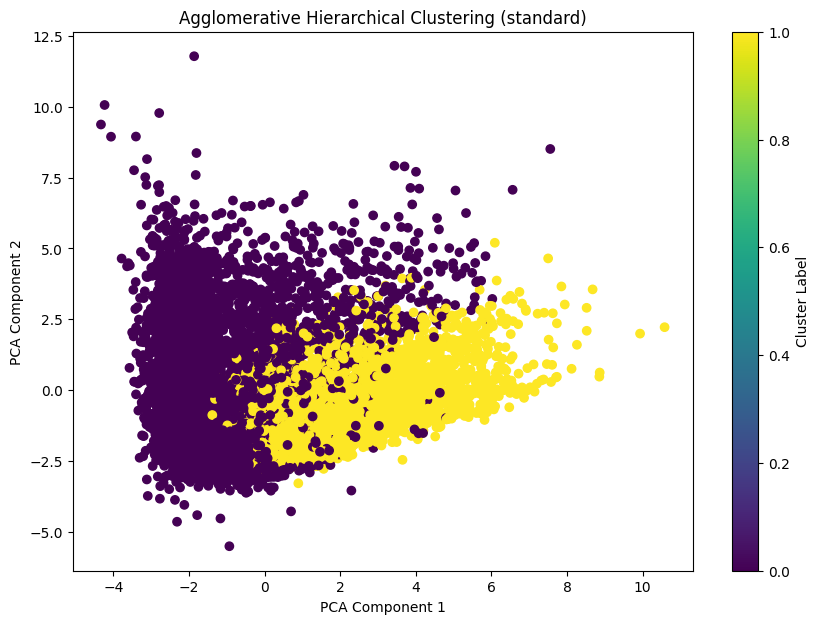


Processing scaling method: minmax
Best KMeans parameters: {'n_clusters': 2} with silhouette score: 0.28743599387171687
Best Agglomerative parameters: {'n_clusters': 2} with silhouette score: 0.2575024053599558
Best parameters for minmax scaling: eps = 0.5, min_samples = 9 with silhouette score: 0.1662835416187505


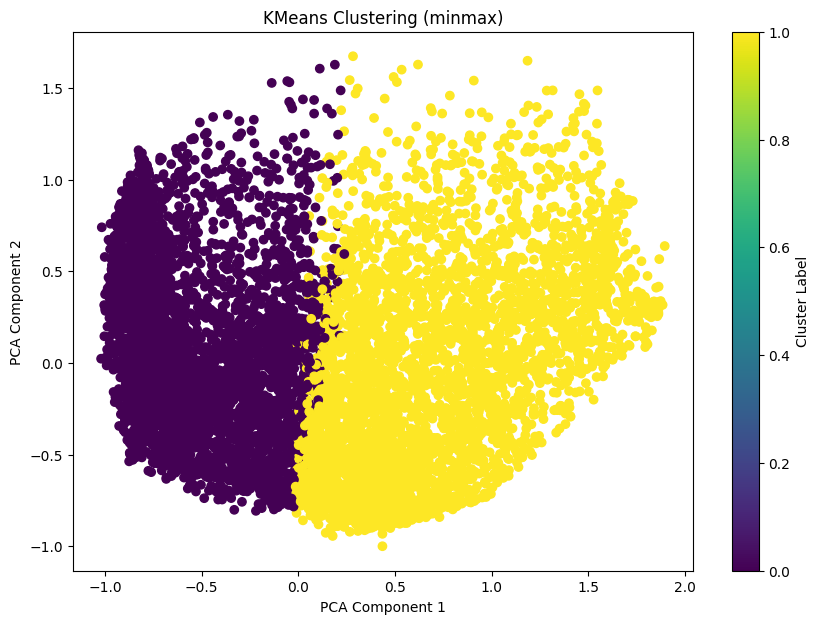

Best parameters for minmax scaling: eps = 0.5, min_samples = 9 with silhouette score: 0.1662835416187505


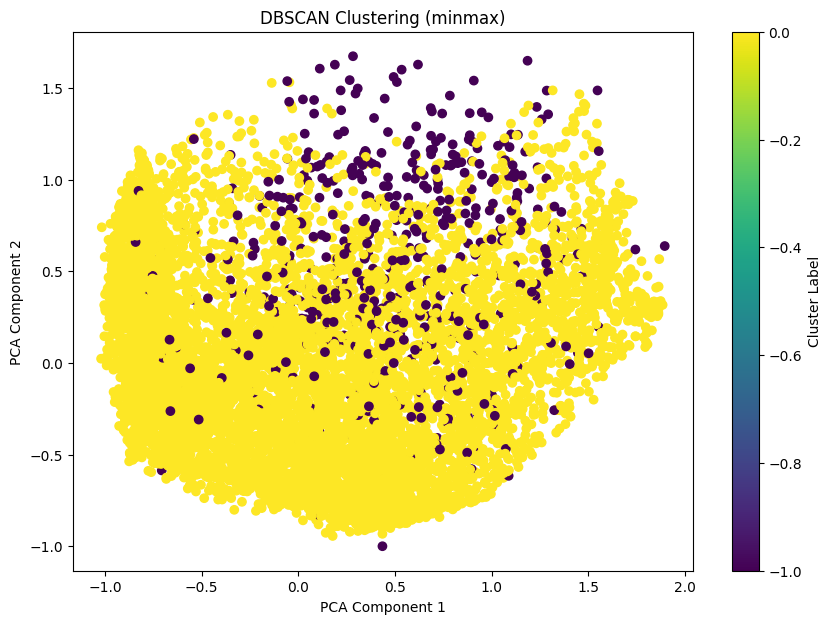

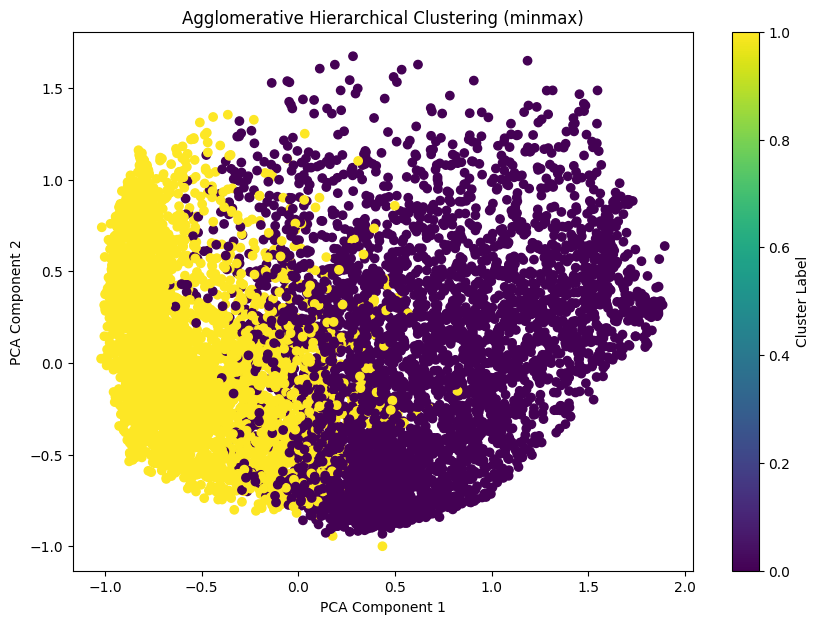


Processing scaling method: robust
Best KMeans parameters: {'n_clusters': 3} with silhouette score: 0.3172982511583064
Best Agglomerative parameters: {'n_clusters': 3} with silhouette score: 0.2649008726642706
Best parameters for robust scaling: eps = 2, min_samples = 6 with silhouette score: 0.3016375180674844


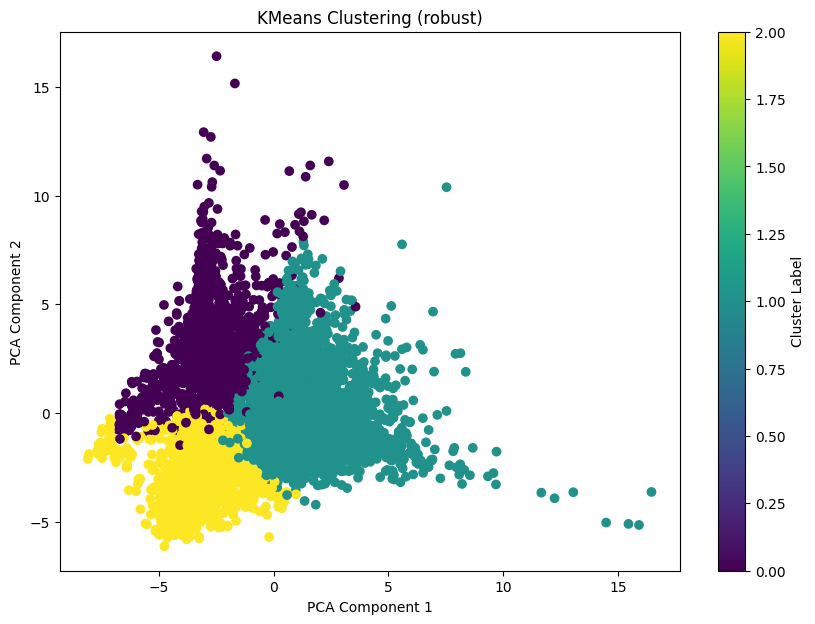

Best parameters for robust scaling: eps = 2, min_samples = 6 with silhouette score: 0.3016375180674844


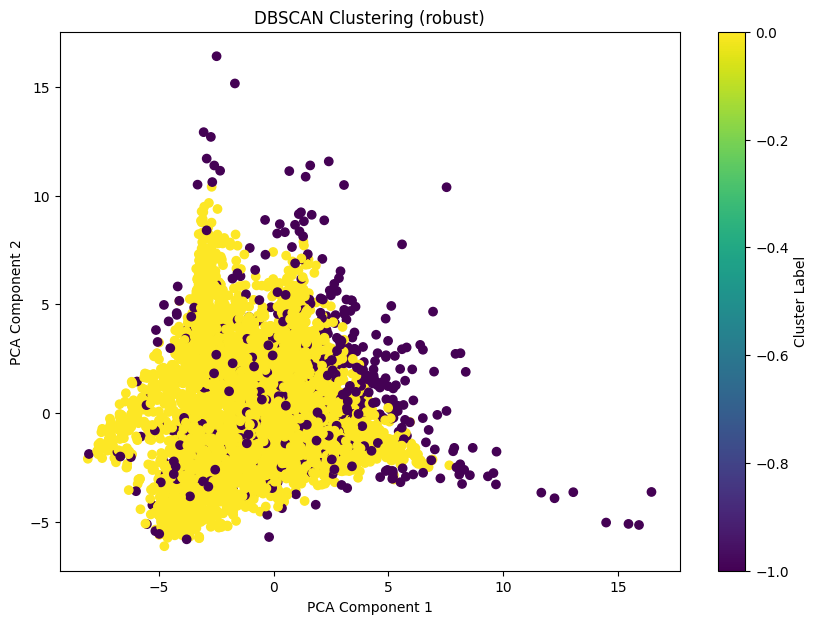

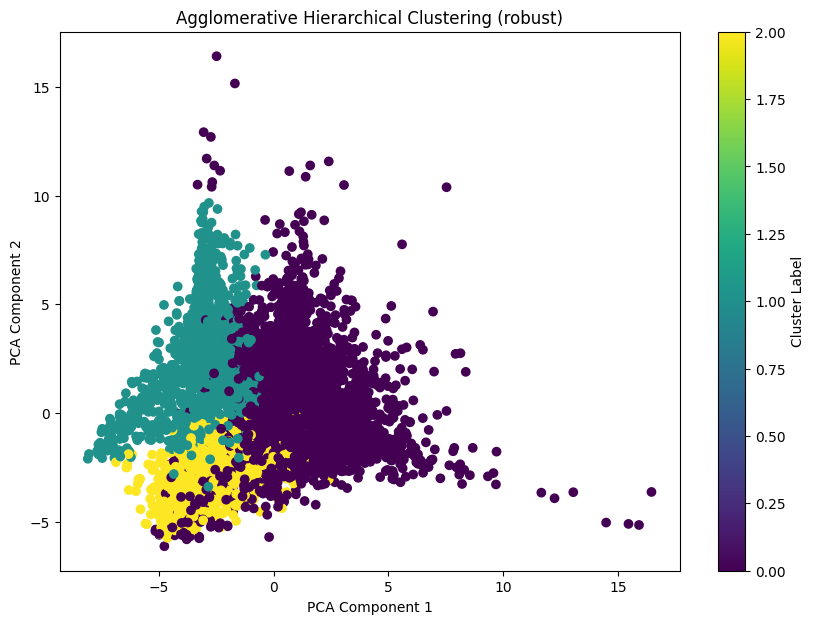

In [207]:
# Applying clustering technique for each scaling method and plotting them
def cluster_and_plot(df_handled, scaling_method, kmeans_params=None, dbscan_params=None, agglomerative_params=None):
    scaled_df = scale_data(df_handled, scaling_method)

    # KMeans
    if kmeans_params:
        kmeans = KMeans(n_clusters=kmeans_params['n_clusters'], random_state=42)
        kmeans_labels = kmeans.fit_predict(scaled_df)
        plot_pca_clusters(scaled_df, kmeans_labels, f'KMeans Clustering ({scaling_method})')

    # DBSCAN
    if dbscan_params:
        eps, min_samples = find_best_dbscan(scaled_df, scaling_method)
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(scaled_df)
        plot_pca_clusters(scaled_df, dbscan_labels, f'DBSCAN Clustering ({scaling_method})')

    # Agglomerative Hierarchical Clustering
    if agglomerative_params:
        agglomerative = AgglomerativeClustering(n_clusters=agglomerative_params['n_clusters'])
        agglomerative_labels = agglomerative.fit_predict(scaled_df)
        plot_pca_clusters(scaled_df, agglomerative_labels, f'Agglomerative Hierarchical Clustering ({scaling_method})')



scaling_methods = ['standard', 'minmax', 'robust']

for scaling_method in scaling_methods:
    print(f"\nProcessing scaling method: {scaling_method}")
    scaled_df = scale_data(df_handled, scaling_method)

    # Find best parameters for each clustering method
    best_kmeans_params = find_best_kmeans_params(scaled_df)
    best_agglomerative_params = find_best_agglomerative_params(scaled_df)
    best_dbscan_params = find_best_dbscan(scaled_df, scaling_method)


    # Perform clustering and plotting with the best parameters
    cluster_and_plot(df_handled, scaling_method,
                     kmeans_params=best_kmeans_params,
                     dbscan_params=best_dbscan_params,
                     agglomerative_params=best_agglomerative_params)